Bag of Words: Represents the text as an unordered collection of words, counting their occurrences in the document.

Bag of N-grams: Extends Bag of Words by considering sequences of N words (e.g., bigrams, trigrams) to capture word context.

- Limitations of Bag of N-grams:
  1. Increased Dimensionality: As N increases, the feature space grows exponentially, leading to sparsity.
  2. Data Sparsity: Many N-grams may not appear in all documents, resulting in a sparse representation.
  3. Context Loss: While N-grams capture some context, they still don't understand the deeper meaning of the words.
  4. Higher Computational Cost: The number of features increases with higher N, making it computationally expensive.
  5. Does Not Handle Synonyms: Different N-grams with similar meanings are treated as distinct features.


In [1]:
from sklearn.feature_extraction.text import CountVectorizer

Bag of Words

In [3]:
v = CountVectorizer()
v.fit(["Machine learning is a fascinating field of study in data science."])
v.vocabulary_

{'machine': 6,
 'learning': 5,
 'is': 4,
 'fascinating': 1,
 'field': 2,
 'of': 7,
 'study': 9,
 'in': 3,
 'data': 0,
 'science': 8}

Bag of N-Grams

In [8]:
#if we pass (2, 2) in ngram_range it will only create two word tokens
bi_v = CountVectorizer(ngram_range=(2, 2))
bi_v.fit(["Machine learning is a fascinating field of study in data science."])
bi_v.vocabulary_

{'machine learning': 6,
 'learning is': 5,
 'is fascinating': 4,
 'fascinating field': 1,
 'field of': 2,
 'of study': 7,
 'study in': 8,
 'in data': 3,
 'data science': 0}

In [9]:
# but if we pass (1, 2) it will create both single and two word tokens
single_bi_gram_v = CountVectorizer(ngram_range=(1, 2))
single_bi_gram_v.fit(["Machine learning is a fascinating field of study in data science."])
single_bi_gram_v.vocabulary_

{'machine': 12,
 'learning': 10,
 'is': 8,
 'fascinating': 2,
 'field': 4,
 'of': 14,
 'study': 17,
 'in': 6,
 'data': 0,
 'science': 16,
 'machine learning': 13,
 'learning is': 11,
 'is fascinating': 9,
 'fascinating field': 3,
 'field of': 5,
 'of study': 15,
 'study in': 18,
 'in data': 7,
 'data science': 1}

A basic set of text documents will be preprocessed to eliminate stop words, lemmatize, and other issues before being used to create a bag of 1-gram and 2-gram documents.

In [10]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [11]:
def preprocessing(text):
  doc = nlp(text)

  filtered_tokens = []

  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_tokens.append(token.lemma_)

  return " ".join(filtered_tokens)

In [18]:
corpus = [
    "The cat is sleeping.",
    "Mask reads a book every night.",
    "Machine learning is a fascinating field of study."
]

In [19]:
filtered_corpus = [preprocessing(doc) for doc in corpus]
filtered_corpus

['cat sleep',
 'Mask read book night',
 'machine learning fascinating field study']

In [20]:
bi_gram_v = CountVectorizer(ngram_range=(1, 2))
bi_gram_v.fit(filtered_corpus)
bi_gram_v.vocabulary_

{'cat': 2,
 'sleep': 17,
 'cat sleep': 3,
 'mask': 12,
 'read': 15,
 'book': 0,
 'night': 14,
 'mask read': 13,
 'read book': 16,
 'book night': 1,
 'machine': 10,
 'learning': 8,
 'fascinating': 4,
 'field': 6,
 'study': 18,
 'machine learning': 11,
 'learning fascinating': 9,
 'fascinating field': 5,
 'field study': 7}

Now generate bag of n gram vector for few sample documents.

In [21]:
bi_gram_v.transform(["Mask reads a book every night."]).toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

Let's take a document that has out of vocabulary (OOV) term and see how bag of ngram generates vector out of it.

In [22]:
bi_gram_v.transform(["Elon reads a book every night."]).toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

#News Category Classification Problem
 Here we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one category

#Dataset
Dataset Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65

- This data consists of two columns. - Text - Category
- Text is a news article
- Category can be one of these 4: 'BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE', to keep things simple I trimmed additional categories from the original dataset

In [25]:
import pandas as pd

df = pd.read_json("/content/news_dataset.json")
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [26]:
df.shape

(12695, 2)

In [27]:
df['category'].value_counts()

,count
category,
BUSINESS,4254
SPORTS,4167
CRIME,2893
SCIENCE,1381


#Handling class Imbalance:
Class imbalance occurs when certain classes in the dataset have significantly fewer samples than others. This can lead to biased model predictions, especially towards the majority class.

Common techniques to handle class imbalance include:

 1. **Resampling**:
    - **Oversampling**: Increasing the number of instances in the minority class using techniques like SMOTE (Synthetic Minority Over-sampling Technique and it uses the knn method to increase samples).
    - **Undersampling**: Reducing the number of instances in the majority class to balance the classes.

 2. **Ensemble Methods**:
    - Techniques like Balanced Random Forest and EasyEnsemble are specifically designed to address class imbalance.

 3. **Evaluation Metrics**:
    - Use metrics like Precision, Recall, F1-Score, and ROC-AUC instead of accuracy to better evaluate model performance on imbalanced data.

These methods help improve model performance by ensuring that the minority class is adequately represented and taken into account during training.


In [67]:
df['category_num'] = df['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1,
    'CRIME': 2,
    'SCIENCE': 3
})

df.head()

,text,category,category_num
0,Watching Schrödinger's Cat Die University of C...,SCIENCE,3
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE,3
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS,0
3,These Roads Could Recharge Your Electric Car A...,BUSINESS,0
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME,2


In [68]:
#here we are going to pre-process our text column
df['pre-processed_text'] = df['text'].apply(preprocessing)
df.head()

,text,category,category_num,pre-processed_text
0,Watching Schrödinger's Cat Die University of C...,SCIENCE,3,watch Schrödinger Cat Die University Californi...
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE,3,WATCH Freaky vortex open Flooded Lake
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS,0,entrepreneur today need Big Budget start year ...
3,These Roads Could Recharge Your Electric Car A...,BUSINESS,0,road recharge electric Car drive high tech hig...
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME,2,Civilian Guard Fires Gun protect Recruiting Ce...


#1. Undersampling

In [70]:
#we have min sample in our dataset is "1381"
min_sample = 1381

df_business = df[df['category'] == 'BUSINESS'].sample(min_sample, random_state=42)
df_sports = df[df['category'] == 'SPORTS'].sample(min_sample, random_state=42)
df_crime = df[df['category'] == 'CRIME'].sample(min_sample, random_state=42)
df_science = df[df['category'] == 'SCIENCE'].sample(min_sample, random_state=42)

min_sample_df = pd.concat([df_business, df_sports, df_crime, df_science], axis=0)
min_sample_df['category'].value_counts()

,count
category,
BUSINESS,1381
SPORTS,1381
CRIME,1381
SCIENCE,1381


we have our minority sample dataset is ready now we will pre-processing the dataset

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(min_sample_df['pre-processed_text'],
                                                    min_sample_df['category_num'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=min_sample_df['category_num']
                                                    )

#stratify parameter in train_test_split function took same amount of data from each category
y_train.value_counts()

,count
category_num,
0,1105
3,1105
1,1105
2,1104


In [72]:
#Here in this cell we will use Bag of Words with by default single tokens vectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       276
           1       0.90      0.87      0.88       276
           2       0.89      0.94      0.91       277
           3       0.91      0.83      0.87       276

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105



In [73]:
#In this cell we will use bigram bag of words with single and two word tokens vectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1, 2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       276
           1       0.91      0.88      0.89       276
           2       0.89      0.94      0.91       277
           3       0.93      0.83      0.88       276

    accuracy                           0.89      1105
   macro avg       0.89      0.89      0.89      1105
weighted avg       0.89      0.89      0.89      1105



In [74]:
X_test[:5]

,pre-processed_text
12446,shocking Video Officer Punching Woman Ignites ...
3868,YOLO ATTACK Birthday Stabbing turn Party War Z...
3301,Great News Obamacare
11543,Katie Nolan call Dallas Cowboys help Greg Hard...
9501,market Tumble Fears Global Economic Slowdown s...


In [75]:
y_test[:5]

,category_num
12446,2
3868,2
3301,0
11543,1
9501,0


In [76]:
y_pred[:5]

array([2, 2, 0, 1, 0])

#2. Oversampling (SMOTE)

In [92]:
X = df['pre-processed_text']
y = df['category_num']

In [93]:
y.value_counts()

,count
category_num,
0,4254
1,4167
2,2893
3,1381


In [94]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(X)

In [95]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

,count
category_num,
3,4254
0,4254
2,4254
1,4254


In [96]:
mb = MultinomialNB()

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

mb.fit(X_train, y_train)

y_pred = mb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       839
           1       0.89      0.91      0.90       846
           2       0.89      0.78      0.83       883
           3       0.80      0.84      0.82       836

    accuracy                           0.86      3404
   macro avg       0.86      0.86      0.85      3404
weighted avg       0.86      0.86      0.85      3404



#Plotting Confusion Matrix

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[756,  35,  31,  17],
       [ 31, 766,  37,  12],
       [ 30,  20, 685, 148],
       [ 78,  35,  19, 704]])

Text(45.722222222222214, 0.5, 'Truth')

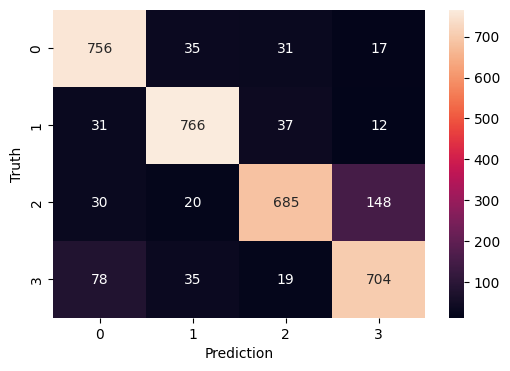

In [103]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

#Exercise
- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

- Fake news spreads faster than Real news and creates problems and fear among groups and in society.

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

- You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

**About Data: Fake News Detection**
Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

- This data consists of two columns. - Text - label

- Text is the statements or messages regarding a particular event/situation.

- label feature tells whether the given Text is Fake or Real.

- As there are only 2 classes, this problem comes under the Binary Classification.

In [2]:
#import pandas library
import pandas as pd
#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("/content/Fake_Real_Data.csv", )

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head()

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
#check the distribution of labels
df['label'].value_counts()

,count
label,
Fake,5000
Real,4900


From the above, we can see that almost the labels(classes) occured equal number of times and balanced. There is no problem of class imbalance and hence no need to apply any balancing techniques like undersampling, oversampling etc.

In [6]:
#Add the new column "label_num" which gives a unique number to each of these labels
df['label_num'] = df['label'].map({
    'Fake': 0,
    'Real': 1
})

#check the results with top 5 rows
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


#Modelling without Pre-processing Text data

In [8]:
#import train-test-split from sklearn
from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['label_num'], test_size=0.2, random_state=2022, stratify=df['label_num'])

In [9]:
#print the shapes of X_train and X_test
print("Train Shape: ", X_train.shape)
print("Test Shape", X_test.shape)

Train Shape:  (7920,)
Test Shape (1980,)


**Attempt 1 :**

  1. using sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

- using CountVectorizer with unigram, bigram, and trigrams.
- use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
- print the classification report.

In [20]:
#1. create a pipeline object
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,3))),
    ('KNN', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.49      0.65      1000
           1       0.65      0.98      0.78       980

    accuracy                           0.73      1980
   macro avg       0.81      0.74      0.72      1980
weighted avg       0.81      0.73      0.72      1980



**Attempt 2 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

- using CountVectorizer with unigram, bigram, and trigrams.
- use **KNN** as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
- print the classification report.

In [19]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('KNN', KNeighborsClassifier(n_neighbors=10, metric='cosine'))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.55      0.71      1000
           1       0.69      1.00      0.81       980

    accuracy                           0.77      1980
   macro avg       0.84      0.77      0.76      1980
weighted avg       0.84      0.77      0.76      1980



**Attempt 3 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

- using CountVectorizer with only trigrams.
- use RandomForest as the classifier.
- print the classification report.

In [22]:
from sklearn.ensemble import RandomForestClassifier
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(3,3))),
    ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1000
           1       0.98      0.99      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



**Attempt 4 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

- using CountVectorizer with both unigram and bigrams.
- use Multinomial Naive Bayes as the classifier with an alpha value of 0.75.
- print the classification report.

In [23]:
from sklearn.naive_bayes import MultinomialNB
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('Multi NB', MultinomialNB(alpha=0.75))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.98      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



#Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [24]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
      if token.is_stop or token.is_punct:
        continue
      filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [25]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
# this will take some time, please be patient
df['Pre-Processed_Text'] = df['Text'].apply(preprocess)

In [26]:
#print the top 5 rows
df.head()

,Text,label,label_num,Pre-Processed_Text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump Surrogate BRUTALLY Stabs Pathetic vide...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow million illegally pu...
4,Democrats say Trump agrees to work on immigrat...,Real,1,Democrats Trump agree work immigration bill wa...


#Build a model with pre processed text

In [27]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Make sure to use only the "preprocessed_txt" column for splitting
X_train, X_test, y_train, y_test = train_test_split(df['Pre-Processed_Text'], df['label_num'], test_size=0.2, random_state=2022, stratify=df['label_num'])

**Let's check the scores with our best model till now**

- Random Forest

**Attempt1 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

1. using CountVectorizer with only trigrams.
2. use **RandomForest** as the classifier.
3. print the classification report.

In [29]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(3,3))),
    ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1000
           1       0.99      0.93      0.96       980

    accuracy                           0.96      1980
   macro avg       0.96      0.96      0.96      1980
weighted avg       0.96      0.96      0.96      1980



**Attempt2 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

1. using CountVectorizer with unigram, Bigram, and trigrams.
2. use **RandomForest** as the classifier.
3. print the classification report.

In [30]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('RandomForest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



#Plotting Confusion Matrix

In [31]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[999,   1],
       [  3, 977]])

Text(45.722222222222214, 0.5, 'Truth')

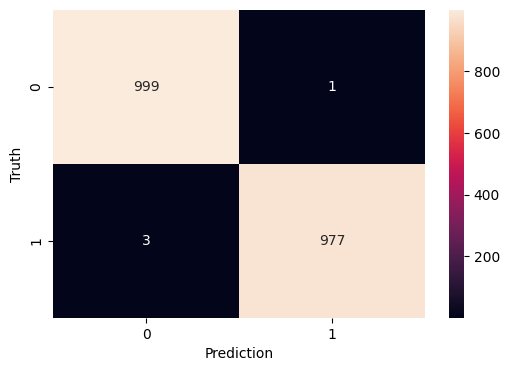

In [32]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

#Final Observation

1. **Text to Vectors**: ML models need text converted to numbers. Bag of Words with CountVectorizer does this, creating high-dimensional vectors.

2. **Without Preprocessing**:

- Higher n-grams (like trigrams) increase dimensions, leading to overfitting.

- KNN fails with trigrams and Euclidean distance but improves with cosine.

- Random Forest and Naive Bayes perform well. RF excels in recall with trigrams due to feature sampling. Naive Bayes uses word probabilities efficiently.

3. **With Preprocessing**:

- RF with trigrams alone doesn't work as well, but combining unigrams to trigrams gives better results.

